# Importing Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


# Loading the preprocessed data

In [3]:
# Define the path to the preprocessed dataset
data = pd.read_csv('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/data/diabetes/preprocessed_data2.csv')

# Display the first few rows of the dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0            6    148.0           72.0           35.0    169.5  33.6  \
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2   
0                     0.627   50        1              True             False  \
1                     0.351   31        0             False             False   
2                     0.672   32        1             False             False   
3                     0.167   21        0             False             False   
4                     2.288   33        1             False             False   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight   
0             Fals

# Assume 'Outcome' is the column name for labels. 

In [4]:
print(data.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')


In [5]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']


# splitting data into training and test set


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Initialize the SVC with probability enabled

In [7]:
svc = SVC(probability=True)

# Define the parameter grid


In [8]:
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

# Initialize GridSearchCV

In [9]:
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

# Print best parameters and best score

In [10]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 0.001}
Best Cross-Validation Score: 0.866531475930171


# Re-fit the SVC with the best parameters found

In [11]:
best_svc = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], probability=True)
best_svc.fit(X_train, y_train)

SVC(C=1, gamma=0.001, probability=True)

# Make predictions on the test set

In [12]:
y_pred = best_svc.predict(X_test)

# Print model accuracy on training and test sets


In [13]:
print("Training Accuracy:", accuracy_score(y_train, best_svc.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Training Accuracy: 0.9060150375939849
Test Accuracy: 0.9122807017543859


# Plotting the confusion matrix


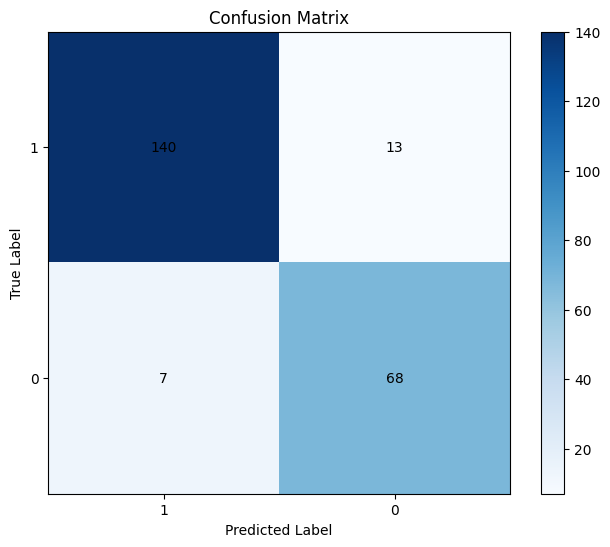

In [14]:
# Predict probabilities for ROC curve
y_pred_proba = best_svc.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(data['Outcome'].unique())), data['Outcome'].unique())
plt.yticks(range(len(data['Outcome'].unique())), data['Outcome'].unique())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.text(0, 0, cm[0, 0], horizontalalignment="center", verticalalignment="center")
plt.text(0, 1, cm[0, 1], horizontalalignment="center", verticalalignment="center")
plt.text(1, 0, cm[1, 0], horizontalalignment="center", verticalalignment="center")
plt.text(1, 1, cm[1, 1], horizontalalignment="center", verticalalignment="center")
plt.grid(False)
plt.show()

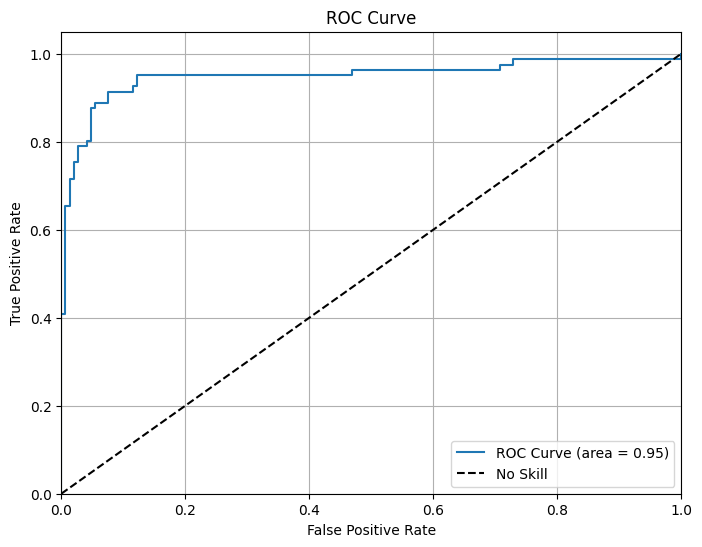

In [15]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [17]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report for SVM Model:\n", report)

Classification Report for SVM Model:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       147
           1       0.91      0.84      0.87        81

    accuracy                           0.91       228
   macro avg       0.91      0.90      0.90       228
weighted avg       0.91      0.91      0.91       228



In [18]:
import pickle

# Save the model to disk
filename = 'C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/diabetes/svm_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_svc, file)

print("Model saved as 'svm_model.pkl'")

Model saved as 'svm_model.pkl'


In [19]:
# Load the model from disk
filename = 'C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/diabetes/svm_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)


print("Model loaded successfully.")

Model loaded successfully.


In [20]:
import pickle
import numpy as np

# Define the predict function
def predict(values, dic):
    if len(values) == 8:
        dic2 = {'NewBMI_Obesity 1': 0, 'NewBMI_Obesity 2': 0, 'NewBMI_Obesity 3': 0, 'NewBMI_Overweight': 0,
                'NewBMI_Underweight': 0, 'NewInsulinScore_Normal': 0, 'NewGlucose_Low': 0,
                'NewGlucose_Normal': 0, 'NewGlucose_Overweight': 0, 'NewGlucose_Secret': 0}

        if dic['BMI'] <= 18.5:
            dic2['NewBMI_Underweight'] = 1
        elif 18.5 < dic['BMI'] <= 24.9:
            pass
        elif 24.9 < dic['BMI'] <= 29.9:
            dic2['NewBMI_Overweight'] = 1
        elif 29.9 < dic['BMI'] <= 34.9:
            dic2['NewBMI_Obesity 1'] = 1
        elif 34.9 < dic['BMI'] <= 39.9:
            dic2['NewBMI_Obesity 2'] = 1
        elif dic['BMI'] > 39.9:
            dic2['NewBMI_Obesity 3'] = 1

        if 16 <= dic['Insulin'] <= 166:
            dic2['NewInsulinScore_Normal'] = 1

        if dic['Glucose'] <= 70:
            dic2['NewGlucose_Low'] = 1
        elif 70 < dic['Glucose'] <= 99:
            dic2['NewGlucose_Normal'] = 1
        elif 99 < dic['Glucose'] <= 126:
            dic2['NewGlucose_Overweight'] = 1
        elif dic['Glucose'] > 126:
            dic2['NewGlucose_Secret'] = 1

        dic.update(dic2)
        values2 = list(map(float, list(dic.values())))

        model = pickle.load(open('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/diabetes/svm_model.pkl','rb'))
        values = np.asarray(values2)
        return model.predict(values.reshape(1, -1))[0]
    pass

# Example input data
# This should match the structure expected by the predict function
input_data = {
    'Pregnancies': 6,
    'Glucose': 148.0,
    'BloodPressure': 72.0,
    'SkinThickness': 35.0,
    'Insulin': 169.5,
    'BMI': 33.6,
    'DiabetesPedigreeFunction': 0.627,
    'Age': 50
}

# Call the predict function with the input data
prediction = predict(list(input_data.values()), input_data)

# Print the prediction
print("Prediction:", prediction)

Prediction: 1


C:\Users\SIDDHI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
